In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv('C:\\Users\Windows\_ANCONDA WORKSHOP\datasets\Classified Data.csv',index_col=0)

In [12]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler= StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [23]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [25]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [26]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [27]:
from sklearn.model_selection import train_test_split

In [31]:
X=df_feat #or X=scaled_features
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
pred=knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[193  11]
 [ 21 175]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       204
           1       0.94      0.89      0.92       196

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [43]:
(pred !=y_test).value_counts()

False    368
True      32
Name: TARGET CLASS, dtype: int64

In [44]:
np.mean(pred !=y_test) #rate of True values

0.08

In [66]:
#now for optimum k value
error_rate=[]
for i in range(150,200):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))
    

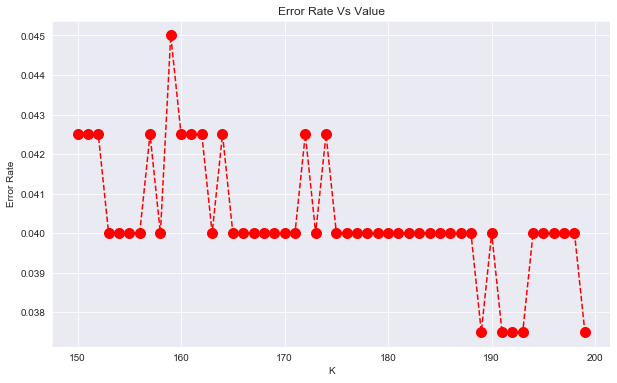

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(150,200),error_rate,color='red',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
sns.set_style('darkgrid')

In [71]:
# running code again for 14 as a optimum value
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,digits=5))

[[196   8]
 [ 10 186]]


              precision    recall  f1-score   support

           0    0.95146   0.96078   0.95610       204
           1    0.95876   0.94898   0.95385       196

    accuracy                        0.95500       400
   macro avg    0.95511   0.95488   0.95497       400
weighted avg    0.95504   0.95500   0.95499       400



##### got 96% precision 

In [70]:
# running code again for 24 as a optimum value
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,digits=5))

[[197   7]
 [ 10 186]]


              precision    recall  f1-score   support

           0    0.95169   0.96569   0.95864       204
           1    0.96373   0.94898   0.95630       196

    accuracy                        0.95750       400
   macro avg    0.95771   0.95733   0.95747       400
weighted avg    0.95759   0.95750   0.95749       400



##### got 96% precision but one less false value than in case of k=14

In [69]:
# running code again for 24 as a optimum value
knn=KNeighborsClassifier(n_neighbors=199)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,digits=5))

[[193  11]
 [  4 192]]


              precision    recall  f1-score   support

           0    0.97970   0.94608   0.96259       204
           1    0.94581   0.97959   0.96241       196

    accuracy                        0.96250       400
   macro avg    0.96275   0.96284   0.96250       400
weighted avg    0.96309   0.96250   0.96250       400

